In [174]:
import numpy
import pandas
import matplotlib.pyplot as plt

In [175]:
def concat_dfs(train_df, test_df):
    return pandas.concat([train_df, test_df]).reset_index(drop=True)

def split_dfs(all_dfs):
    train_df = all_dfs.loc[:890]
    test_df = all_dfs.loc[891:].drop('Survived', axis='columns')
    return train_df, test_df

In [176]:
def split_single(df, split_percent=0.8):
    size = df.shape[0]
    split_idx = size * split_percent

    all_targets = df['Survived']
    all_df = df.drop(columns=['Survived'])

    return all_df.loc[:split_idx], all_targets.loc[:split_idx], all_df.loc[split_idx:], all_targets.loc[split_idx:], 

## Load in dataframes and see missing information

In [177]:
train_df = pandas.read_csv("data/train.csv")
test_df = pandas.read_csv("data/test.csv")
all_df = concat_dfs(train_df, test_df)

train_df.name = 'Training Set' 
test_df.name = 'Test Set' 
all_df.name = 'All Data'

In [178]:
all_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [179]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


## A quick analysis

Survived
0    549
1    342
dtype: int64


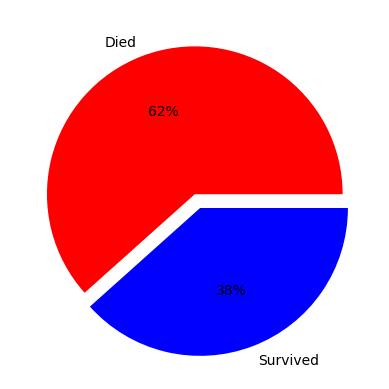

In [180]:
survival_count = train_df.groupby(['Survived']).size()
print(survival_count)

plt.pie(survival_count, labels=['Died', 'Survived'], colors = ['red','blue'], explode=[0,0.1], autopct='%1.0f%%')
plt.show()

## How do sex and class impact survival rate?

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64 

Male Survival rate: 0.18890814558058924
female Survival rate: 0.7420382165605095


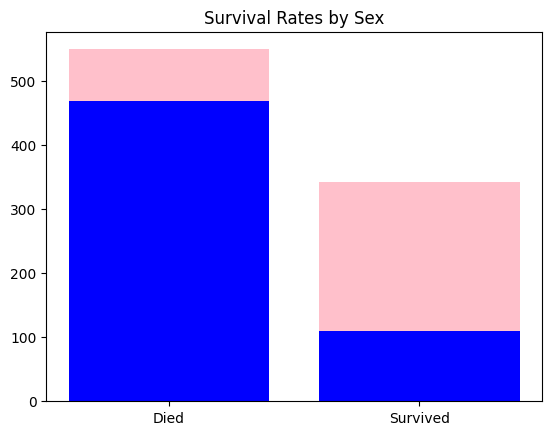

In [181]:
sex_survival_rate = train_df.groupby(['Sex', 'Survived']).size()
sex_count = train_df.groupby(['Sex']).size()
print(sex_survival_rate, "\n")

male_survival_rate = sex_survival_rate['male'][1] / float(sex_count['male'])
female_survival_rate = sex_survival_rate['female'][1] / float(sex_count['female'])

print(f"Male Survival rate: {male_survival_rate}")
print(f"female Survival rate: {female_survival_rate}")

x = ["Died", "Survived"]
y1 = [sex_survival_rate['male'][0], sex_survival_rate['male'][1]]
y2 = [sex_survival_rate['female'][0], sex_survival_rate['female'][1]]

plt.bar(x, y1, color='b', label='male')
plt.bar(x, y2, bottom=y1, color='pink', label='female')
plt.title("Survival Rates by Sex")
plt.show()

Class 1 survival rate: 0.6296296296296297
Class 2 survival rate: 0.47282608695652173
Class 3 survival rate: 0.24236252545824846



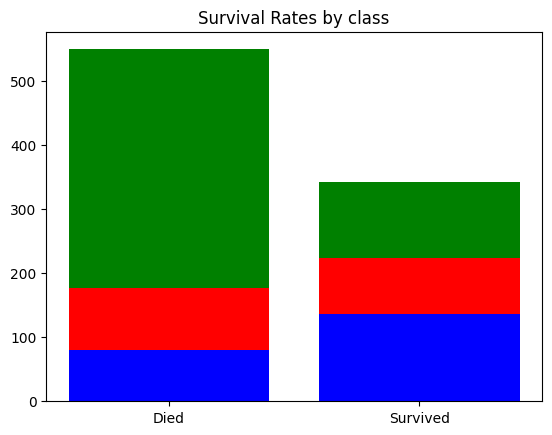

In [182]:
class_survival_rate = train_df.groupby(['Pclass', 'Survived']).size()

for i in range(1,4):
    survival_rate = float(class_survival_rate[i][1]) / (class_survival_rate[i][1] + class_survival_rate[i][0])
    print(f"Class {i} survival rate: {survival_rate}")
print()

x = ['Died', 'Survived']
y1 = numpy.array([class_survival_rate[1][0], class_survival_rate[1][1]])
y2 = numpy.array([class_survival_rate[2][0], class_survival_rate[2][1]])
y3 = numpy.array([class_survival_rate[3][0], class_survival_rate[3][1]])

plt.bar(x, y1, color='b', label='First Class')
plt.bar(x, y2, bottom=y1, color='r', label='Second Class')
plt.bar(x, y3, bottom=y1+y2, color='g', label='Third Class')
plt.title("Survival Rates by class")
plt.show()


## Fill in the missing 'Embarked' values
With some simple research, we observe that they travelled together and boarded from Southampton

In [183]:
all_df[all_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [184]:
all_df['Embarked'] = all_df['Embarked'].fillna('S')

## Filling in a missing fare

With some research, we find that his ticket was 7 pounds and 5 shillings.

In [185]:
all_df[all_df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [186]:
all_df['Fare'] = all_df['Fare'].fillna(7.5)

## Engineering a new feature: Family Size

In [187]:
all_df['FamilySize'] = all_df['SibSp'] + all_df['Parch']
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


Size: 0  Rate: 0.30353817504655495
Size: 1  Rate: 0.5527950310559007
Size: 2  Rate: 0.5784313725490197
Size: 3  Rate: 0.7241379310344828
Size: 4  Rate: 0.2
Size: 5  Rate: 0.13636363636363635
Size: 6  Rate: 0.3333333333333333
Size: 7  Rate: 0.0
Size: 10  Rate: 0.0


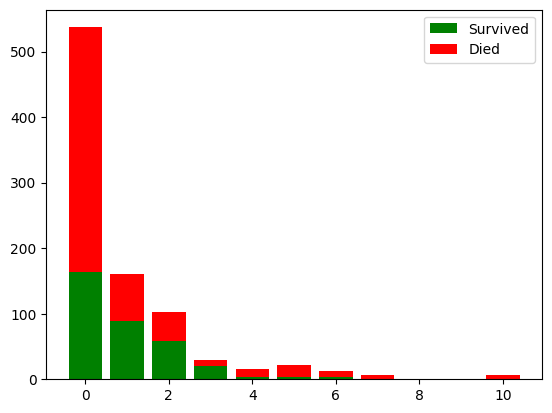

In [188]:
groupby_familySize = all_df.groupby(['FamilySize', 'Survived']).size()

x = sorted(all_df['FamilySize'].unique())

def safeGet(i):
    try:
        return groupby_familySize[i][1]
    except KeyError:
        return 0

y1 = [safeGet(i) for i in x]
y2 = [groupby_familySize[i][0] for i in x]

for i in range(len(x)):
    print(f"Size: {x[i]}  Rate: {y1[i]/(y1[i] + y2[i])}")

plt.bar(x, y1, color='green', label='Survived')
plt.bar(x, y2, bottom=y1, color='red', label='Died')
plt.legend()
plt.show()


### Binning the family sizes

In [189]:
all_df['FamilySize'] = all_df['FamilySize'].apply(lambda x : 'Alone' if x == 0 else 
                                                 'Small' if x >= 1 and x < 4 else 
                                                 'Medium' if x >= 4 and x < 6 else 
                                                 'Large')

In [190]:
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone


## Engineering a new feature: Ticket Frequency. Gives a better idea of who was travelling together
This should catch children who travelled with nannies

In [191]:
ticket_counts = all_df.groupby(['Ticket']).size()
ticket_counts.sort_values()

Ticket
345769           1
349245           1
349246           1
349247           1
349248           1
                ..
PC 17608         7
S.O.C. 14879     7
CA 2144          8
1601             8
CA. 2343        11
Length: 929, dtype: int64

In [192]:
def searchTicketCount(ticket):
    return ticket_counts[ticket]

all_df['Ticket Frequency'] = all_df.apply(lambda x: searchTicketCount(x['Ticket']), axis=1)

### Binning ticket frequency

Ticket Frequency  Survived
1                 0.0         351
                  1.0         130
2                 0.0          88
                  1.0          93
3                 0.0          35
                  1.0          66
4                 0.0          12
                  1.0          32
5                 0.0          14
                  1.0           7
6                 0.0          15
                  1.0           4
7                 0.0          19
                  1.0           5
8                 0.0           8
                  1.0           5
11                0.0           7
dtype: int64 

Frequency: 1  Rate: 0.2702702702702703
Frequency: 2  Rate: 0.5138121546961326
Frequency: 3  Rate: 0.6534653465346535
Frequency: 4  Rate: 0.7272727272727273
Frequency: 5  Rate: 0.3333333333333333
Frequency: 6  Rate: 0.21052631578947367
Frequency: 7  Rate: 0.20833333333333334
Frequency: 8  Rate: 0.38461538461538464
Frequency: 11  Rate: 0.0


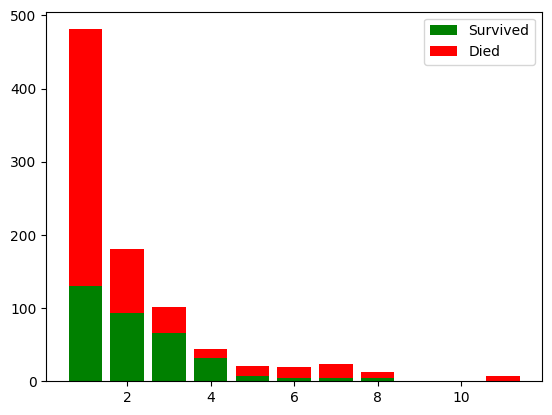

In [193]:
groupby_ticket_freq = all_df.groupby(['Ticket Frequency', 'Survived']).size()

x = sorted(all_df['Ticket Frequency'].unique())
print(groupby_ticket_freq, "\n")

def safeGet(i):
    try:
        return groupby_ticket_freq[i][1]
    except KeyError:
        return 0

y1 = [safeGet(i) for i in x]
y2 = [groupby_ticket_freq[i][0] for i in x]


for i in range(len(x)):
    print(f"Frequency: {x[i]}  Rate: {y1[i]/(y1[i] + y2[i])}")

plt.bar(x, y1, color='green', label='Survived')
plt.bar(x, y2, bottom=y1, color='red', label='Died')
plt.legend()
plt.show()

In [194]:
all_df['Ticket Frequency'] = all_df['Ticket Frequency'].apply(lambda x : 'Alone' if x == 1 else 
                                                 'Low' if x >= 2 and x < 5 else 
                                                 'Medium' if x >= 5 and x < 9 else 
                                                 'High')

In [195]:
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Ticket Frequency
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Small,Alone
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Small,Low
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone,Alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Small,Low
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone,Alone


## Engineering a new feature: Deck

In [196]:
all_df['Deck'] = all_df['Cabin'].apply(lambda s : s[0] if pandas.notnull(s) else 'M')

unique_decks = sorted(all_df['Deck'].unique())
unique_decks

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T']

In [197]:
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Ticket Frequency,Deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Small,Alone,M
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Small,Low,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone,Alone,M
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Small,Low,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone,Alone,M


## Considering the fares and their relationship to deck

In [198]:
all_df.groupby('Deck')['Fare'].median()

Deck
A    35.0771
B    82.2667
C    86.2896
D    52.5542
E    53.1000
F    13.0000
G    16.7000
M    10.5000
T    35.5000
Name: Fare, dtype: float64

## Binning the Fares

In [199]:
all_df['Fare'] = all_df['Fare'].apply(lambda x: 0 if x <= 7.25 else
                                     1 if x <= 7.75 else 
                                     2 if x <= 7.896 else 
                                     3 if x <= 8.05 else 
                                     4 if x <= 10.5 else 
                                     5 if x <= 13 else 
                                     6 if x <= 15.742 else
                                     7 if x <= 23.25 else
                                     8 if x <= 26.55 else 
                                     9 if x <= 34.075 else
                                     10 if x <= 56.496 else 
                                     11 if x <= 83.475 else
                                     12)

In [200]:
all_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Ticket Frequency,Deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0,NaN,S,Small,Alone,M
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,11,C85,C,Small,Low,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,3,NaN,S,Alone,Alone,M
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,10,C123,S,Small,Low,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,3,NaN,S,Alone,Alone,M
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,4,NaN,Q,Alone,Alone,M
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,10,E46,S,Alone,Low,E
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,7,NaN,S,Medium,Medium,M
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,5,NaN,S,Small,Low,M
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,9,NaN,C,Small,Low,M


### Some of the decks have much higher fares. Could this be correlated to class?

In [201]:
deck_counts = all_df.groupby(['Deck']).size()
deck_counts

Deck
A      22
B      65
C      94
D      46
E      41
F      21
G       5
M    1014
T       1
dtype: int64

In [202]:
deck_by_class = all_df.groupby(['Deck', 'Pclass']).size()

In [203]:
deck_by_class

Deck  Pclass
A     1          22
B     1          65
C     1          94
D     1          40
      2           6
E     1          34
      2           4
      3           3
F     2          13
      3           8
G     3           5
M     1          67
      2         254
      3         693
T     1           1
dtype: int64

We can see that A,B,C are all first class cabins. There is one guy in T and he is in first class

Total: 22	 1: 1.0 		 2:0.0 		 3:0.0
Total: 65	 1: 1.0 		 2:0.0 		 3:0.0
Total: 94	 1: 1.0 		 2:0.0 		 3:0.0
Total: 46	 1: 0.8695652173913043 		 2:0.13043478260869565 		 3:0.0
Total: 41	 1: 0.8292682926829268 		 2:0.0975609756097561 		 3:0.07317073170731707
Total: 21	 1: 0.0 		 2:0.6190476190476191 		 3:0.38095238095238093
Total: 5	 1: 0.0 		 2:0.0 		 3:1.0
Total: 1014	 1: 0.06607495069033531 		 2:0.2504930966469428 		 3:0.6834319526627219
Total: 1	 1: 1.0 		 2:0.0 		 3:0.0


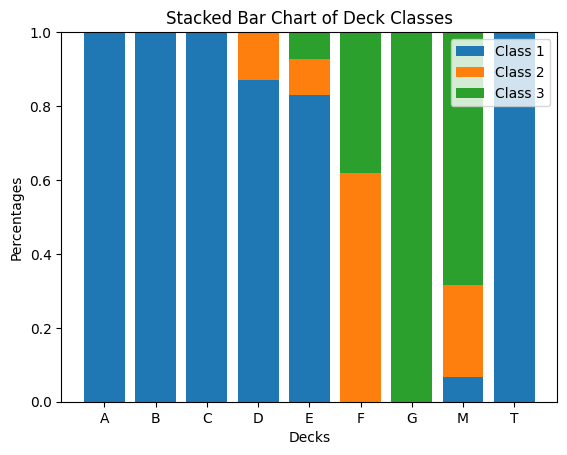

In [204]:
x = unique_decks

WEIGHT = 1

percentClass1 = numpy.array([deck_by_class[deck][1]/deck_counts[deck] * WEIGHT if 1 in deck_by_class[deck] else 0 for deck in unique_decks])
percentClass2 = numpy.array([deck_by_class[deck][2]/deck_counts[deck] * WEIGHT if 2 in deck_by_class[deck] else 0 for deck in unique_decks])
percentClass3 = numpy.array([deck_by_class[deck][3]/deck_counts[deck] * WEIGHT if 3 in deck_by_class[deck] else 0 for deck in unique_decks])

for idx, deck in enumerate(unique_decks):
    print(f"Total: {deck_counts[deck]}\t 1: {percentClass1[idx]} \t\t 2:{percentClass2[idx]} \t\t 3:{percentClass3[idx]}")

# Width of the bars
bar_width = 0.8

# X locations for the groups
x = numpy.arange(len(unique_decks))

# Create the plot
fig, ax = plt.subplots()

# Stacked bar chart
ax.bar(x, percentClass1, bar_width, label='Class 1')
ax.bar(x, percentClass2, bar_width, bottom=percentClass1, label='Class 2')
ax.bar(x, percentClass3, bar_width, bottom=percentClass1 + percentClass2, label='Class 3')

# Add labels, title, and legend
ax.set_xlabel('Decks')
ax.set_ylabel('Percentages')
ax.set_title('Stacked Bar Chart of Deck Classes')
ax.set_xticks(x)
ax.set_xticklabels(unique_decks)
ax.legend()

# Show the plot
plt.show()


## Deck survival rates

In [205]:
train_df, test_df = split_dfs(all_df)

for deck in unique_decks:
    total = len(train_df[train_df['Deck'] == deck])
    survived = len(train_df[(train_df['Deck'] == deck) & (train_df['Survived'] == 1)])
    survival_rate = survived / float(total)
    print(f"Deck: {deck} \t Survival Rate: {survival_rate}")

Deck: A 	 Survival Rate: 0.4666666666666667
Deck: B 	 Survival Rate: 0.7446808510638298
Deck: C 	 Survival Rate: 0.5932203389830508
Deck: D 	 Survival Rate: 0.7575757575757576
Deck: E 	 Survival Rate: 0.75
Deck: F 	 Survival Rate: 0.6153846153846154
Deck: G 	 Survival Rate: 0.5
Deck: M 	 Survival Rate: 0.29985443959243085
Deck: T 	 Survival Rate: 0.0


## Considering classes and deck survival rates, I will group like so:
(A,B,C,T), (D,E), (F,G), M

In [206]:
ABCT = ['A','B','C','T']
DE = ['D','E']
FG = ['F','G']
all_df['Deck'] = all_df['Deck'].apply(lambda x: 
                                      'ABCT' if x in ABCT else 
                                      'DE' if x in DE else 
                                      'FG' if x in FG else x)

## Parsing the names

In [207]:
all_df['Initial'] = all_df['Name'].apply(lambda s : s[0])

In [208]:
all_df['Family Name'] = all_df['Name'].apply(lambda s : s.split(',')[0].strip())
all_df['Title'] = all_df['Name'].apply(lambda s : s.split(',')[1].split('.')[0].strip())

In [209]:
print(all_df['Title'].unique())
all_df.groupby(['Title','Sex']).size()

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']


Title         Sex   
Capt          male        1
Col           male        4
Don           male        1
Dona          female      1
Dr            female      1
              male        7
Jonkheer      male        1
Lady          female      1
Major         male        2
Master        male       61
Miss          female    260
Mlle          female      2
Mme           female      1
Mr            male      757
Mrs           female    197
Ms            female      2
Rev           male        8
Sir           male        1
the Countess  female      1
dtype: int64

In [210]:
train_df, test_df = split_dfs(all_df)

survival_by_title = train_df.groupby(['Title','Survived']).size()
survival_by_title

Title         Survived
Capt          0.0           1
Col           0.0           1
              1.0           1
Don           0.0           1
Dr            0.0           4
              1.0           3
Jonkheer      0.0           1
Lady          1.0           1
Major         0.0           1
              1.0           1
Master        0.0          17
              1.0          23
Miss          0.0          55
              1.0         127
Mlle          1.0           2
Mme           1.0           1
Mr            0.0         436
              1.0          81
Mrs           0.0          26
              1.0          99
Ms            1.0           1
Rev           0.0           6
Sir           1.0           1
the Countess  1.0           1
dtype: int64

Title: Capt  Rate: 0.0
Title: Col  Rate: 0.5
Title: Don  Rate: 0.0
Title: Dr  Rate: 0.42857142857142855
Title: Jonkheer  Rate: 0.0
Title: Lady  Rate: 1.0
Title: Major  Rate: 0.5
Title: Master  Rate: 0.575
Title: Miss  Rate: 0.6978021978021978
Title: Mlle  Rate: 1.0
Title: Mme  Rate: 1.0
Title: Mr  Rate: 0.15667311411992263
Title: Mrs  Rate: 0.792
Title: Ms  Rate: 1.0
Title: Rev  Rate: 0.0
Title: Sir  Rate: 1.0
Title: the Countess  Rate: 1.0


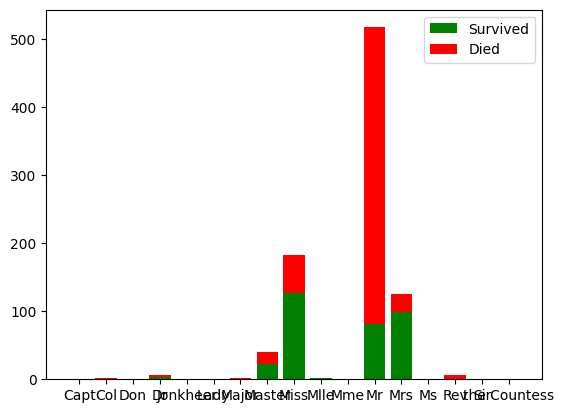

In [211]:
x = sorted(train_df['Title'].unique())

def safeGet(i, survived):
    try:
        return survival_by_title[x[i]][survived]
    except KeyError:
        return 0

y1 = [safeGet(i,1) for i in range(len(x))]
y2 = [safeGet(i,0) for i in range(len(x))]

for i in range(len(x)):
    print(f"Title: {x[i]}  Rate: {y1[i]/(y1[i] + y2[i])}")

plt.bar(x, y1, color='green', label='Survived')
plt.bar(x, y2, bottom=y1, color='red', label='Died')
plt.legend()
plt.show()

In [212]:
def isMarried(x):
    if (x == 'Mrs' or x == 'Mme'):
        return 1
    else:
        return 0

all_df['isMarried'] = all_df['Title'].apply(isMarried)

In [213]:
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Ticket Frequency,Deck,Initial,Family Name,Title,isMarried
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0,NaN,S,Small,Alone,M,B,Braund,Mr,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,11,C85,C,Small,Low,ABCT,C,Cumings,Mrs,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,3,NaN,S,Alone,Alone,M,H,Heikkinen,Miss,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,10,C123,S,Small,Low,ABCT,F,Futrelle,Mrs,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,3,NaN,S,Alone,Alone,M,A,Allen,Mr,0


## Handling the missing age values

Age is most correlated with title and class

In [214]:
age_by_title_and_class = all_df.groupby(['Title', 'Pclass'])['Age'].median().reset_index()
age_by_title_and_class

,Title,Pclass,Age
0,Capt,1,70.0
1,Col,1,54.5
2,Don,1,40.0
3,Dona,1,39.0
4,Dr,1,49.0
5,Dr,2,38.5
6,Jonkheer,1,38.0
7,Lady,1,48.0
8,Major,1,48.5
9,Master,1,6.0


In [215]:
def fill_missing_age(row):
    if pandas.isnull(row['Age']):
        median_age = age_by_title_and_class[
            (age_by_title_and_class['Title'] == row['Title']) & 
            (age_by_title_and_class['Pclass'] == row['Pclass'])
        ]['Age'].values[0]
        return median_age
    else:
        return row['Age']

In [216]:
all_df['Age'] = all_df.apply(fill_missing_age, axis=1)

In [217]:
# One anomaly is still null

all_df[all_df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Ticket Frequency,Deck,Initial,Family Name,Title,isMarried
979,980,NaN,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,1,NaN,Q,Alone,Alone,M,O,O'Donoghue,Ms,0


In [218]:
all_df.groupby(['Pclass'])['Age'].median() # so fill it in with her class

Pclass
1    41.5
2    29.0
3    26.0
Name: Age, dtype: float64

In [219]:
all_df['Age'] = all_df['Age'].fillna(26)

## Binning the ages

Age: 0.42  Rate: 1.0
Age: 0.67  Rate: 1.0
Age: 0.75  Rate: 1.0
Age: 0.83  Rate: 1.0
Age: 0.92  Rate: 1.0
Age: 1.0  Rate: 0.7142857142857143
Age: 2.0  Rate: 0.3
Age: 3.0  Rate: 0.8333333333333334
Age: 4.0  Rate: 0.7
Age: 5.0  Rate: 1.0
Age: 6.0  Rate: 0.5714285714285714
Age: 7.0  Rate: 0.3333333333333333
Age: 8.0  Rate: 0.5
Age: 9.0  Rate: 0.25
Age: 10.0  Rate: 0.0
Age: 11.0  Rate: 0.25
Age: 12.0  Rate: 1.0
Age: 13.0  Rate: 1.0
Age: 14.0  Rate: 0.5
Age: 14.5  Rate: 0.0
Age: 15.0  Rate: 0.8
Age: 16.0  Rate: 0.35294117647058826
Age: 17.0  Rate: 0.46153846153846156
Age: 18.0  Rate: 0.4745762711864407
Age: 19.0  Rate: 0.36
Age: 20.0  Rate: 0.29411764705882354
Age: 20.5  Rate: 0.0
Age: 21.0  Rate: 0.20833333333333334
Age: 22.0  Rate: 0.4074074074074074
Age: 23.0  Rate: 0.3333333333333333
Age: 23.5  Rate: 0.0
Age: 24.0  Rate: 0.5
Age: 24.5  Rate: 0.0
Age: 25.0  Rate: 0.2608695652173913
Age: 26.0  Rate: 0.12037037037037036
Age: 27.0  Rate: 0.6111111111111112
Age: 28.0  Rate: 0.28
Age: 28.5  Ra

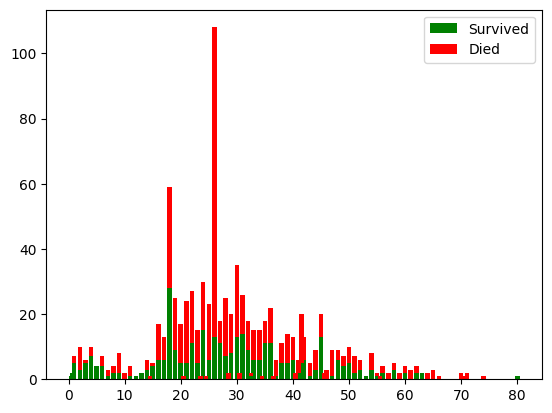

In [220]:
train_df, test_df = split_dfs(all_df)

groupby_Age = train_df.groupby(['Age', 'Survived']).size()

x = sorted(train_df['Age'].unique()) # unique ages

def safeGet(i, survived):
    try:
        return groupby_Age[i][survived]
    except KeyError:
        return 0

y1 = [safeGet(i, 1) for i in x]
y2 = [safeGet(i, 0) for i in x]


for i in range(len(x)):
    print(f"Age: {x[i]}  Rate: {y1[i]/(y1[i] + y2[i])}")

plt.bar(x, y1, color='green', label='Survived')
plt.bar(x, y2, bottom=y1, color='red', label='Died')
plt.legend()
plt.show()

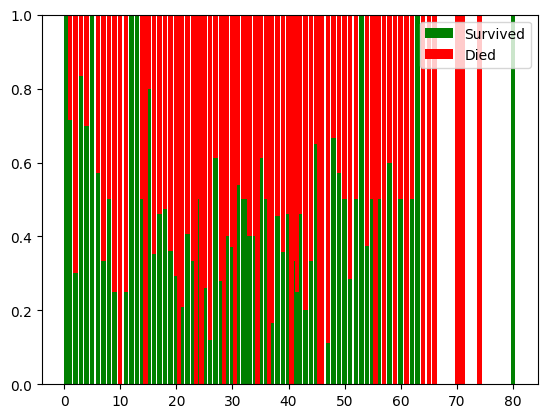

In [221]:
y1 = [safeGet(i, 1) / (safeGet(i, 1) + safeGet(i, 0)) for i in x]
y2 = [safeGet(i, 0) / (safeGet(i, 1) + safeGet(i, 0))for i in x]

plt.bar(x, y1, color='green', label='Survived')
plt.bar(x, y2, bottom=y1, color='red', label='Died')
plt.legend()
plt.show()

In [222]:
all_df['Age'] = all_df['Age'].apply(lambda x: 'Child' if x < 10 else
                                   'Teen' if x < 20 else
                                   'Twenties' if x < 30 else 
                                   'Thirties' if x < 40 else 
                                   'Early Fourties' if x < 46 else
                                   'Approaching Senior' if x < 55 else
                                   'Senior' if x < 64 else
                                   'Old')

In [223]:
from sklearn.preprocessing import LabelEncoder

ageEncoder = LabelEncoder()
ageEncoder.fit(all_df['Age'].unique())
all_df['Age'] = ageEncoder.transform(all_df['Age'])

Age: 0  Rate: 0.4166666666666667
Age: 1  Rate: 0.6060606060606061
Age: 2  Rate: 0.4
Age: 3  Rate: 0.07692307692307693
Age: 4  Rate: 0.41379310344827586
Age: 5  Rate: 0.4444444444444444
Age: 6  Rate: 0.44086021505376344
Age: 7  Rate: 0.27564102564102566


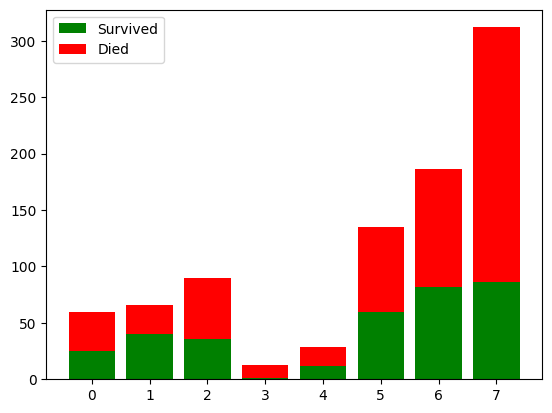

In [224]:
train_df, test_df = split_dfs(all_df)

groupby_Age = train_df.groupby(['Age', 'Survived']).size()

x = sorted(train_df['Age'].unique()) # unique ages

def safeGet(i, survived):
    try:
        return groupby_Age[i][survived]
    except KeyError:
        return 0

y1 = [safeGet(i, 1) for i in x]
y2 = [safeGet(i, 0) for i in x]


for i in range(len(x)):
    print(f"Age: {x[i]}  Rate: {y1[i]/(y1[i] + y2[i])}")

plt.bar(x, y1, color='green', label='Survived')
plt.bar(x, y2, bottom=y1, color='red', label='Died')
plt.legend()
plt.show()

### Grouping the titles by sex and status

In [225]:
def bin_title(x):
    female_general = ['Miss','Mrs','Ms','Mme','Mlle']
    if x == 'Mr':
        return 'Mr'
    elif x in female_general:
        return 'Ms'
    elif x == 'Master':
        return 'Master'
    else:
        return 'other'

all_df['Title'] = all_df['Title'].apply(bin_title)

In [226]:
all_df.groupby(['Title']).size()

Title
Master     61
Mr        757
Ms        462
other      29
dtype: int64

Title: Master  Rate: 0.575
Title: Mr  Rate: 0.15667311411992263
Title: Ms  Rate: 0.7395498392282959
Title: other  Rate: 0.34782608695652173


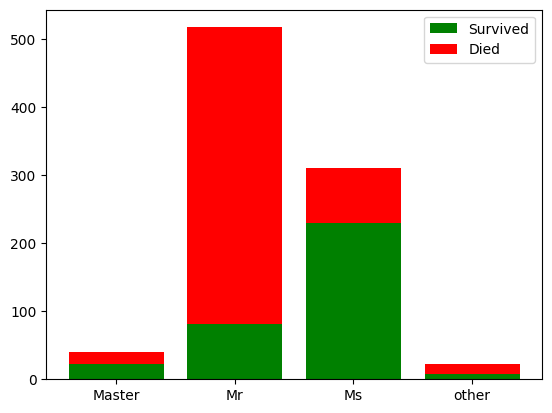

In [227]:
train_df, test_df = split_dfs(all_df)

survival_by_title = train_df.groupby(['Title','Survived']).size()

x = sorted(train_df['Title'].unique())

def safeGet(i, survived):
    try:
        return survival_by_title[x[i]][survived]
    except KeyError:
        return 0

y1 = [safeGet(i,1) for i in range(len(x))]
y2 = [safeGet(i,0) for i in range(len(x))]

for i in range(len(x)):
    print(f"Title: {x[i]}  Rate: {y1[i]/(y1[i] + y2[i])}")

plt.bar(x, y1, color='green', label='Survived')
plt.bar(x, y2, bottom=y1, color='red', label='Died')
plt.legend()
plt.show()

In [228]:
all_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Ticket Frequency,Deck,Initial,Family Name,Title,isMarried
0,1,0.0,3,"Braund, Mr. Owen Harris",male,7,1,0,A/5 21171,0,NaN,S,Small,Alone,M,B,Braund,Mr,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,6,1,0,PC 17599,11,C85,C,Small,Low,ABCT,C,Cumings,Ms,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,7,0,0,STON/O2. 3101282,3,NaN,S,Alone,Alone,M,H,Heikkinen,Ms,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,6,1,0,113803,10,C123,S,Small,Low,ABCT,F,Futrelle,Ms,1
4,5,0.0,3,"Allen, Mr. William Henry",male,6,0,0,373450,3,NaN,S,Alone,Alone,M,A,Allen,Mr,0
5,6,0.0,3,"Moran, Mr. James",male,7,0,0,330877,4,NaN,Q,Alone,Alone,M,M,Moran,Mr,0
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,0,0,0,17463,10,E46,S,Alone,Low,DE,M,McCarthy,Mr,0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,1,3,1,349909,7,NaN,S,Medium,Medium,M,P,Palsson,Master,0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,7,0,2,347742,5,NaN,S,Small,Low,M,J,Johnson,Ms,1
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,5,1,0,237736,9,NaN,C,Small,Low,M,N,Nasser,Ms,1


## Encode everything

In [229]:
from sklearn.preprocessing import LabelEncoder

sexEncoder = LabelEncoder()
deckEncoder = LabelEncoder()
familySizeEncoder = LabelEncoder()
ticketFreqEncoder = LabelEncoder()
fareEncoder = LabelEncoder()
titleEncoder = LabelEncoder()
familyEncoder = LabelEncoder()
initialEncoder = LabelEncoder()
embarkEncoder = LabelEncoder()
fareEncoder = LabelEncoder()

sexEncoder.fit(all_df['Sex'].unique())
deckEncoder.fit(all_df['Deck'].unique())
familySizeEncoder.fit(all_df['FamilySize'].unique())
ticketFreqEncoder.fit(all_df['Ticket Frequency'].unique())
fareEncoder.fit(all_df['Fare'].unique())
titleEncoder.fit(all_df['Title'].unique())
familyEncoder.fit(all_df['Family Name'].unique())
initialEncoder.fit(all_df['Initial'].unique())
embarkEncoder.fit(all_df['Embarked'].unique())
fareEncoder.fit(all_df['Fare'].unique())

all_df['Sex'] = sexEncoder.transform(all_df['Sex'])
all_df['Deck'] = deckEncoder.transform(all_df['Deck'])
all_df['FamilySize'] = familySizeEncoder.transform(all_df['FamilySize'])
all_df['Ticket Frequency'] = ticketFreqEncoder.transform(all_df['Ticket Frequency'])
all_df['Fare'] = fareEncoder.transform(all_df['Fare'])
all_df['Title'] = titleEncoder.transform(all_df['Title'])
all_df['Family Name'] = familyEncoder.transform(all_df['Family Name'])
all_df['Initial'] = initialEncoder.transform(all_df['Initial'])
all_df['Embarked'] = embarkEncoder.transform(all_df['Embarked'])
all_df['Fare'] = fareEncoder.transform(all_df['Fare'])

all_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Ticket Frequency,Deck,Initial,Family Name,Title,isMarried
0,1,0.0,3,"Braund, Mr. Owen Harris",1,7,1,0,A/5 21171,0,NaN,2,3,0,3,1,100,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,6,1,0,PC 17599,11,C85,0,3,2,0,2,182,2,1
2,3,1.0,3,"Heikkinen, Miss. Laina",0,7,0,0,STON/O2. 3101282,3,NaN,2,0,0,3,7,329,2,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,6,1,0,113803,10,C123,2,3,2,0,5,267,2,1
4,5,0.0,3,"Allen, Mr. William Henry",1,6,0,0,373450,3,NaN,2,0,0,3,0,15,1,0
5,6,0.0,3,"Moran, Mr. James",1,7,0,0,330877,4,NaN,1,0,0,3,12,538,1,0
6,7,0.0,1,"McCarthy, Mr. Timothy J",1,0,0,0,17463,10,E46,2,0,2,1,12,500,1,0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",1,1,3,1,349909,7,NaN,2,2,3,3,15,608,0,0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,7,0,2,347742,5,NaN,2,3,2,3,9,382,2,1
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,5,1,0,237736,9,NaN,0,3,2,3,13,559,2,1


## What is age the most likely correlated with?

In [230]:
all_df.info(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       1309 non-null   int64  
 1   Survived          891 non-null    float64
 2   Pclass            1309 non-null   int64  
 3   Name              1309 non-null   object 
 4   Sex               1309 non-null   int64  
 5   Age               1309 non-null   int64  
 6   SibSp             1309 non-null   int64  
 7   Parch             1309 non-null   int64  
 8   Ticket            1309 non-null   object 
 9   Fare              1309 non-null   int64  
 10  Cabin             295 non-null    object 
 11  Embarked          1309 non-null   int64  
 12  FamilySize        1309 non-null   int64  
 13  Ticket Frequency  1309 non-null   int64  
 14  Deck              1309 non-null   int64  
 15  Initial           1309 non-null   int64  
 16  Family Name       1309 non-null   int64  


## Drop the useless columns

In [231]:
all_df = all_df.drop(columns=['PassengerId', 'Name','Ticket','Cabin'])

## Split the dataframes

In [232]:
train_df, test_df = split_dfs(all_df)

## Test run by dividing the training set and running cross_validation

In [233]:
x_train, y_train, x_test, y_test = split_single(train_df, split_percent=0.8)

In [167]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(max_depth=40,max_features=None,min_samples_leaf=5,min_samples_split=10,n_estimators=500)

def eval_model(model):
    randomforest = model
    randomforest.fit(x_train, y_train)
    y_pred = randomforest.predict(x_test)    
    accuracy_rf = round(accuracy_score(y_pred, y_test) * 100, 2)
    print(accuracy_rf)
    
def eval_model_k_times(model, k=100):
    all_scores = []
    min = 100
    max = 0
    sum = 0
    for i in range(k):
        randomforest = model
        randomforest.fit(x_train, y_train)
        y_pred = randomforest.predict(x_test)    
        accuracy_rf = round(accuracy_score(y_pred, y_test) * 100, 2)

        all_scores.append(accuracy_rf)
        min = accuracy_rf if accuracy_rf < min else min
        max = accuracy_rf if accuracy_rf > max else max
        sum += accuracy_rf

    mean = sum / k
    print(f"Mean: {mean}")
    print(f"Min: {min}")
    print(f"Max: {max}")
    plt.hist(all_scores)

eval_model(rf)

86.52


In [169]:
from sklearn.model_selection import KFold, cross_val_score

X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

# Initialize the K-Fold cross-validator
kf = KFold(n_splits=5, shuffle=True)

# Perform cross-validation
scores = cross_val_score(rf, X, y, cv=kf)

# Print the results
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())


Cross-validation scores: [0.82122905 0.87078652 0.79213483 0.89325843 0.80898876]
Mean accuracy: 0.8372795179210344
Standard deviation of accuracy: 0.03834679704326204


## Kaggle Submission

In [170]:
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

print(X)
print(y)

     Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  FamilySize  \
0         3    1    7      1      0     0         2           3   
1         1    0    6      1      0    11         0           3   
2         3    0    7      0      0     3         2           0   
3         1    0    6      1      0    10         2           3   
4         3    1    6      0      0     3         2           0   
..      ...  ...  ...    ...    ...   ...       ...         ...   
886       2    1    7      0      0     5         2           0   
887       1    0    5      0      0     9         2           0   
888       3    0    5      1      2     8         2           3   
889       1    1    7      0      0     9         0           0   
890       3    1    6      0      0     1         1           0   

     Ticket Frequency  Deck  Initial  Family Name  Title  isMarried  
0                   0     3        1          100      1          0  
1                   2     0        2          182      

## The randomforest hyperparameters were calculated via GridSearchCV. Raw code is below

Params found:

max_depth=None,max_features='sqrt',min_samples_leaf=1,min_samples_split=5,n_estimators=100 (0.7703 on Kaggle)

{'max_depth': 40, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 500}

In [234]:
randomforest = RandomForestClassifier(max_depth=40,max_features=None,min_samples_leaf=5,min_samples_split=10,n_estimators=500)
randomforest.fit(X,y)
y_predicted = randomforest.predict(test_df)

In [235]:
import csv

fieldnames = ["PassengerId", "Survived"]
predictions_dict = []
for i, index in enumerate(test_df.index.values):
    prediction = {
        "PassengerId": index + 1,
        "Survived": int(y_predicted[i])
    }
    predictions_dict.append(prediction)

with open('data/predictions.csv', mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(predictions_dict)